In [2]:
import numpy as np
import sys, os, git

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path + "/.dependencies/pyplot-perso/")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
datapath = git_path + "/.dependencies/gromacstutorials-inputs/"+level+"/"

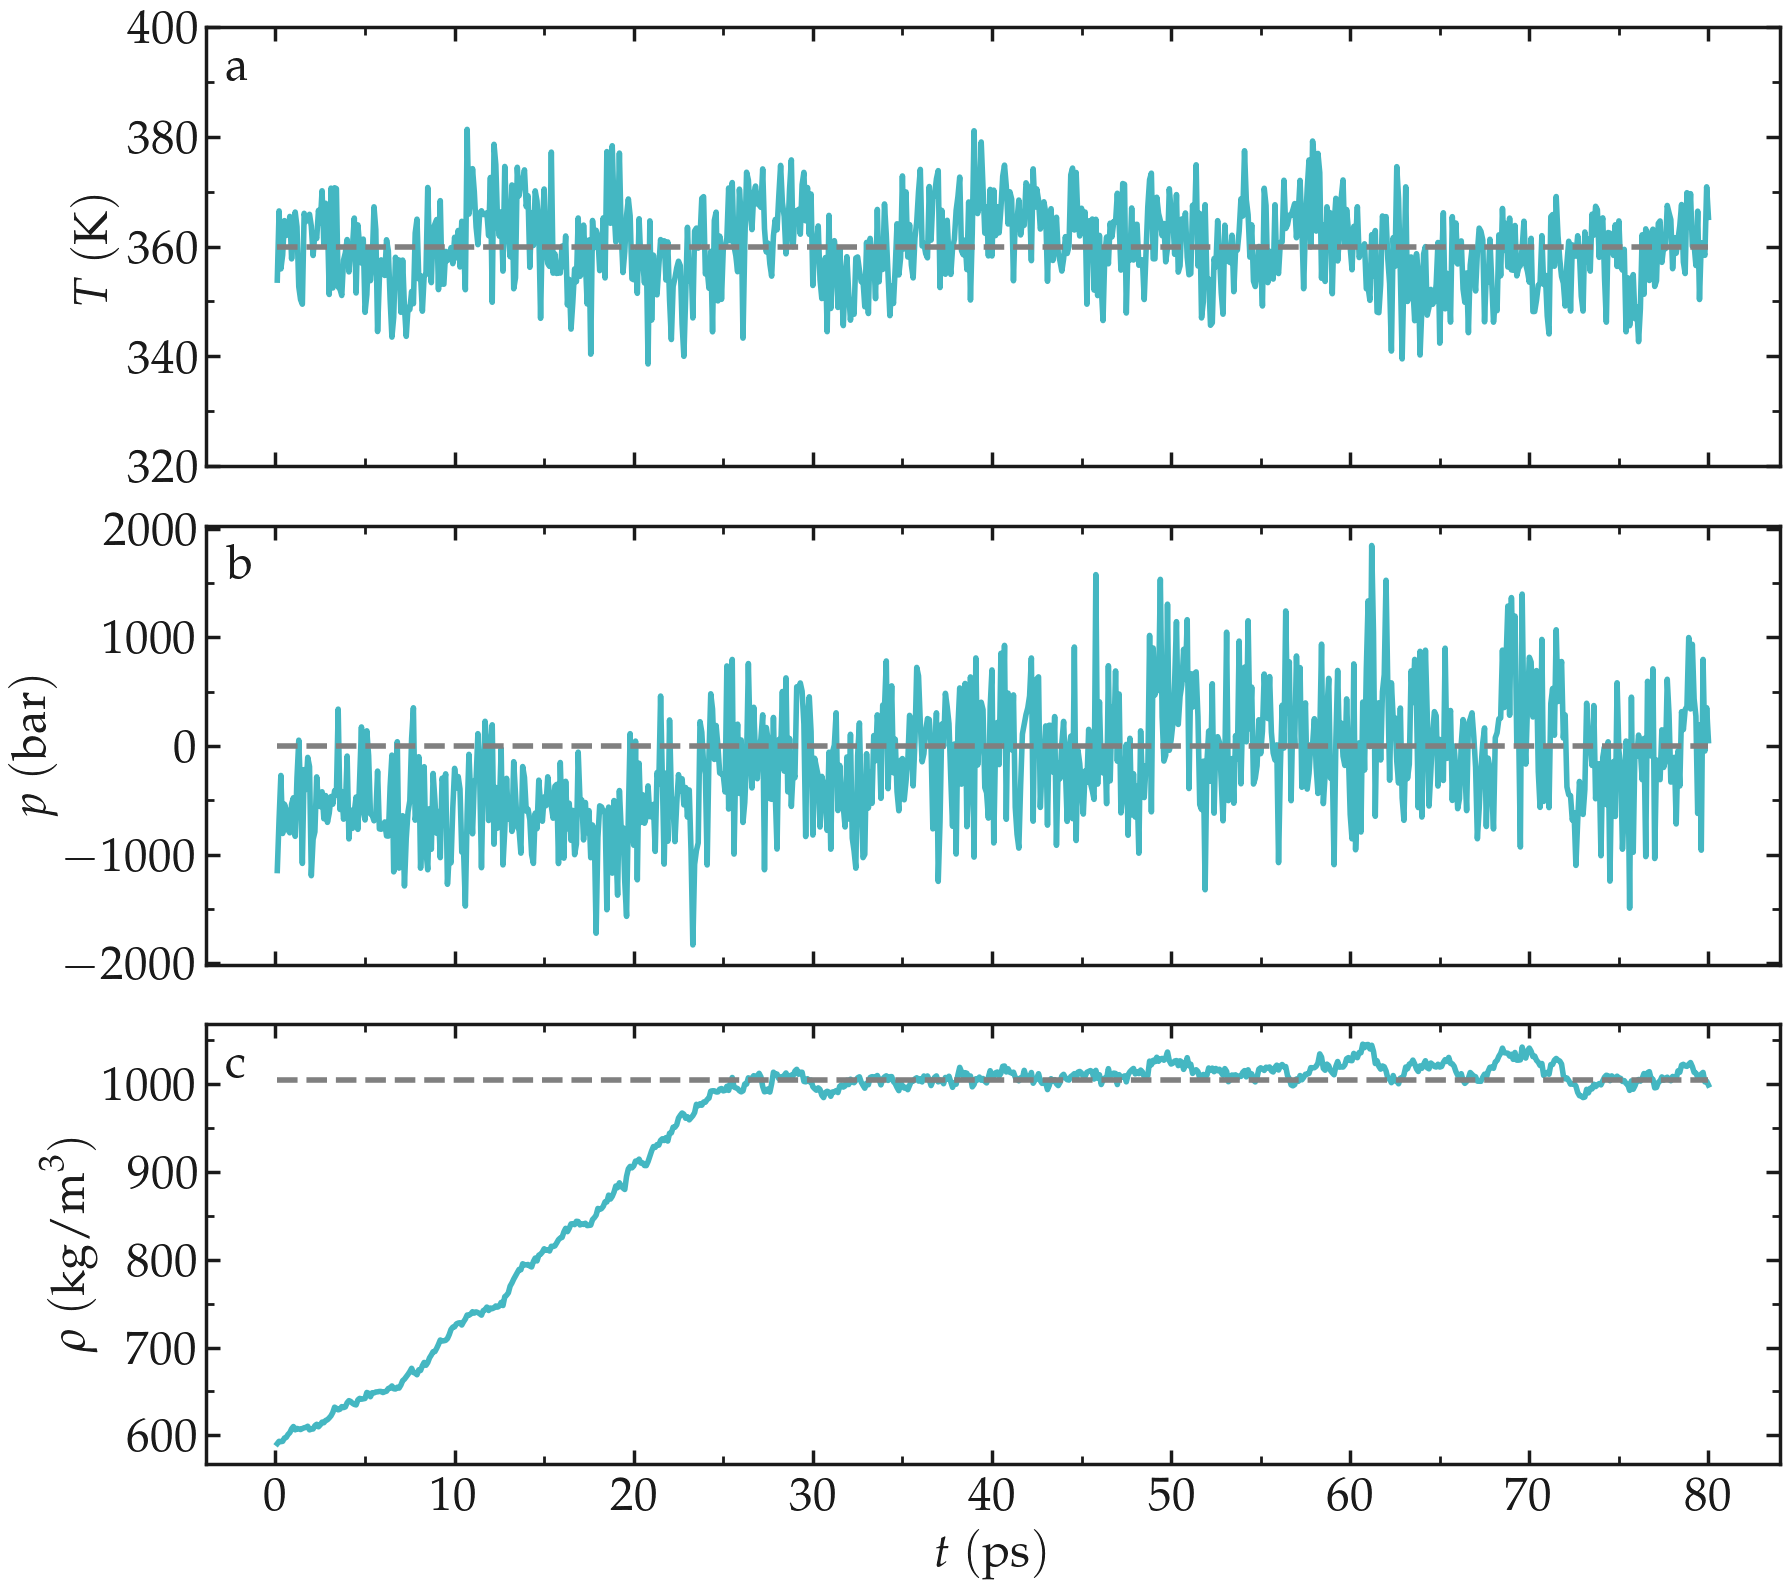

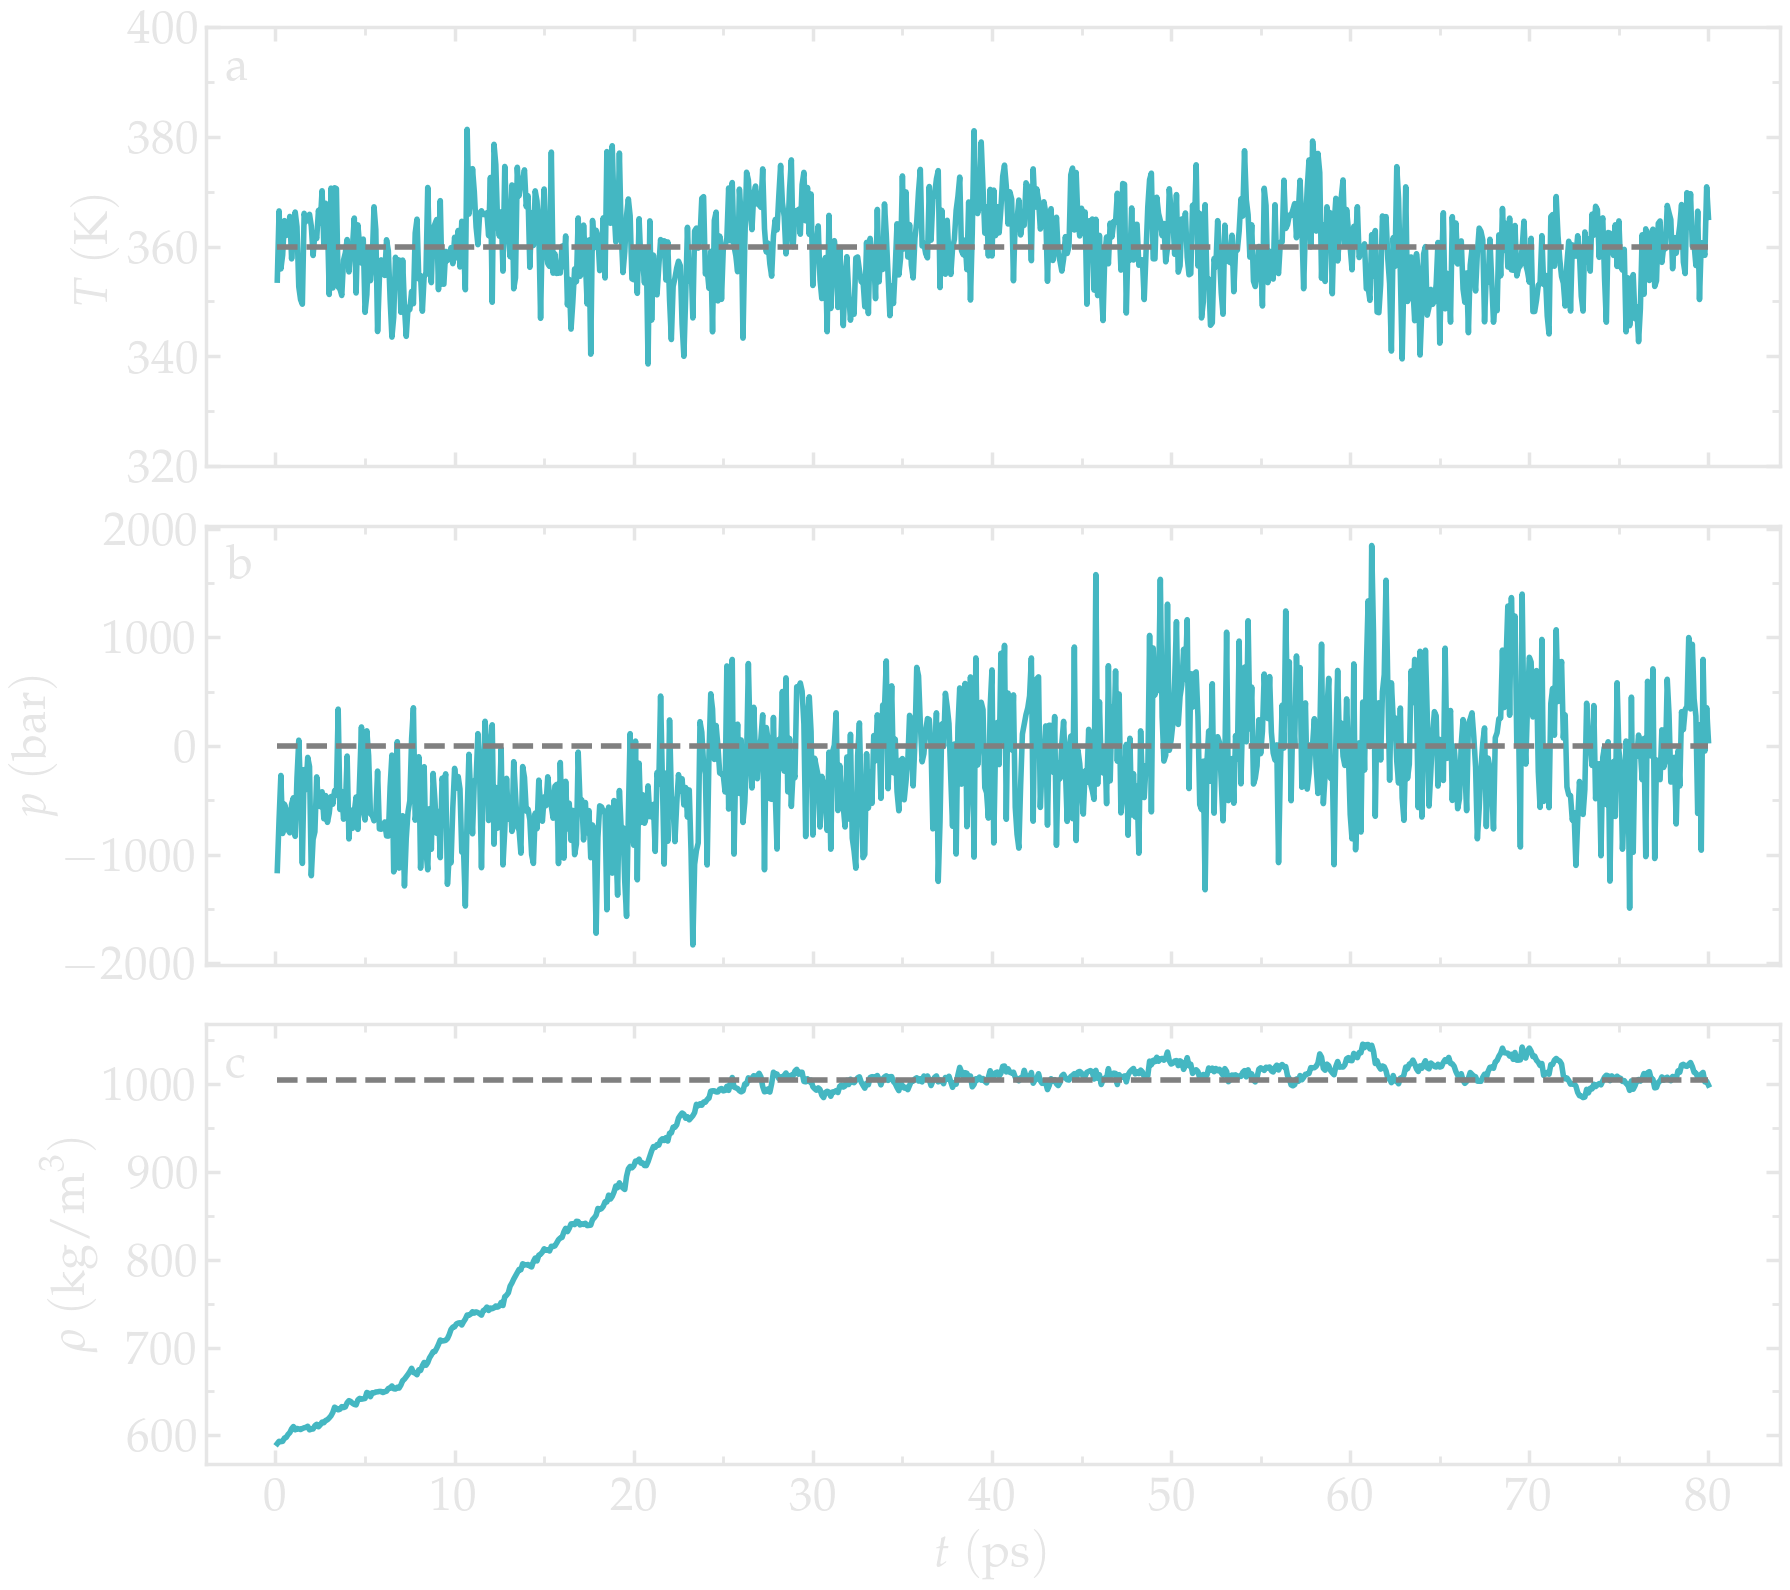

In [4]:
filename = "npt-T-p-rho"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,16), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line = 3)
    myplt.add_panel()
    # Panel 1
    time, T = np.loadtxt(datapath + "npt-T.xvg", skiprows=25).T
    myplt.add_plot(x = time, y = T, linewidth = 4,
                   marker = "-", data_color = 0, markersize = 12,
                   data_label = None)
    myplt.add_plot(x = time, y = T*0 + 360, linewidth = 3,
                   marker = "--", data_color = np.array([0.5, 0.5, 0.5]), markersize = 12,
                   data_label = None)
    myplt.complete_panel(xlabel = None, ylabel = r'$T ~ \mathrm{(K)}$',
                         xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(y_ticks=np.arange(320, 401, 20))
    # Panel 2 
    myplt.add_panel()
    time, p = np.loadtxt(datapath + "npt-p.xvg", skiprows=25).T
    myplt.add_plot(x = time, y = p, linewidth = 4,
                   marker = "-", data_color = 0, markersize = 12,
                   data_label = None)
    myplt.add_plot(x = time, y = T*0 + 0, linewidth = 3,
                   marker = "--", data_color = np.array([0.5, 0.5, 0.5]), markersize = 12,
                   data_label = None)
    myplt.complete_panel(xlabel = None, ylabel = r'$p ~ \mathrm{(bar)}$',
                         xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(y_ticks=np.arange(-2000, 2001, 1000))
    # Panel 3
    myplt.add_panel()
    time, p = np.loadtxt(datapath + "npt-rho.xvg", skiprows=25).T
    myplt.add_plot(x = time, y = p, linewidth = 4,
                   marker = "-", data_color = 0, markersize = 12,
                   data_label = None)
    myplt.add_plot(x = time, y = T*0 + 1005, linewidth = 3,
                   marker = "--", data_color = np.array([0.5, 0.5, 0.5]), markersize = 12,
                   data_label = None)
    myplt.complete_panel(xlabel = r'$t ~ \mathrm{(ps)}$', ylabel = r'$\rho ~ (\mathrm{kg/m}^3)$',
                         xpad = 10, legend=True, handlelength_legend=1)
    myplt.add_subplotlabels(type_label_panel = "a")
    myplt.save_figure(filename = filename, saving_path = './')